In [68]:
import pandas
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [21]:
df = pandas.read_hdf('xenon_test_data.h5')

In [11]:
df.head()

,run_number,event_number,s2_area_tailcut_set_by,s2_over_tdiff,tailcut_set_by,s1_1_50p_width,s1_1_aft,s1_1_area,s1_1_center_time,s1_1_largest_hit_area,...,s2_1_largest_hit_area,s2_1_posrec_goodness_of_fit,s2_1_posrec_goodness_of_fit_nn,s2_1_rise_time,s2_1_x,s2_1_x_nn,s2_1_y,s2_1_y_nn,s2_area_tot,unknown_tot
0,8311,0,0.000000e+00,0.000000,0,NaN,NaN,NaN,NaN,NaN,...,24853.009766,5235.186035,5601.398438,2097.895490,39.483608,39.881187,5.400494,5.610683,2.248347e+06,104.887558
1,8311,1,1.807614e+06,0.006926,1,NaN,NaN,NaN,NaN,NaN,...,33773.347656,6311.308594,7602.618164,1732.494589,3.000274,3.363387,38.043476,38.652359,1.073046e+06,57.850218
2,8311,2,3.333279e+05,0.024004,1,NaN,NaN,NaN,NaN,NaN,...,9166.551758,3222.168213,4315.865723,1890.164546,17.401590,18.061518,22.682072,23.084337,7.985587e+05,38.340455
3,8311,3,6.279493e+05,0.013589,1,NaN,NaN,NaN,NaN,NaN,...,5824.653809,1523.922852,1529.161743,3616.212444,-4.440406,-4.329351,33.723080,33.980186,2.214664e+05,37.059336
4,8311,4,1.807614e+06,0.003888,4,NaN,NaN,NaN,NaN,NaN,...,103230.492188,57072.730469,59293.273438,1676.072953,0.600055,0.041201,40.203674,41.187222,2.451366e+06,105.301023


In [18]:
type(df['s2']), df['s2'].head()

(pandas.core.series.Series, 0    1.807614e+06
 1    3.333279e+05
 2    6.279493e+05
 3    1.461776e+05
 4    1.135693e+06
 Name: s2, dtype: float64)

In [25]:
list(df.columns)

['run_number',
 'event_number',
 's2_area_tailcut_set_by',
 's2_over_tdiff',
 'tailcut_set_by',
 's1_1_50p_width',
 's1_1_aft',
 's1_1_area',
 's1_1_center_time',
 's1_1_largest_hit_area',
 's1_1_posrec_goodness_of_fit',
 's1_1_rise_time',
 's1_1_x',
 's1_1_y',
 'alt_s1_interaction_z',
 'alt_s2_interaction_s2_range_50p_area',
 'alt_s2_interaction_s2_range_80p_area',
 'alt_s2_interaction_x',
 'alt_s2_interaction_y',
 'alt_s2_interaction_z',
 'other_s2_area',
 'other_s2_delay_main_s1',
 'other_s2_delay_main_s2',
 'other_s2_pattern_fit',
 'r_pos_correction',
 's1_area_fraction_top_probability',
 's1_largest_hit_area',
 's1_pattern_fit',
 's1_range_80p_area',
 's1_rise_time',
 's1_tight_coincidence',
 's2_pattern_fit',
 's2_range_80p_area',
 's2_rise_time',
 'sum_s1s_before_main_s2',
 'x_nn',
 'x_tpff',
 'y_nn',
 'y_tpff',
 'z_pos_correction',
 'nearest_1e5pe_event',
 'nearest_1e6pe_event',
 'nearest_3e5pe_event',
 'nearest_busy',
 'nearest_busy_off',
 'nearest_busy_on',
 'nearest_event',


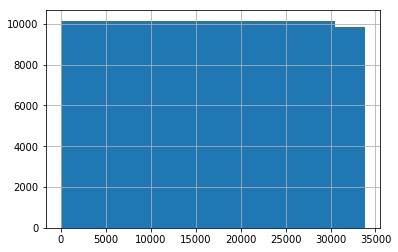

In [26]:
df['event_number'].hist()

In [15]:
!pwd

/ML_platform_tests/tutorial/chris


In [28]:
df['CutAllEnergy'].value_counts()

False    101166
True         68
Name: CutAllEnergy, dtype: int64

In [30]:
df2 = df[df['CutAllEnergy']]

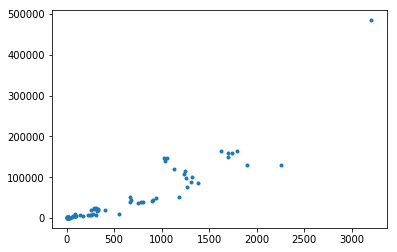

In [36]:
plt.plot(df2.cs1, df2.cs2, '.')

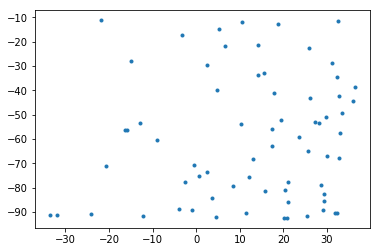

In [39]:
plt.plot(df2.x, df2.z, '.')

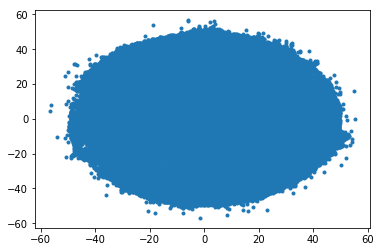

In [38]:
plt.plot(df.x, df.y, '.')

In [42]:
df['r'] = np.sqrt(df['x']**2 + df['y']**2)

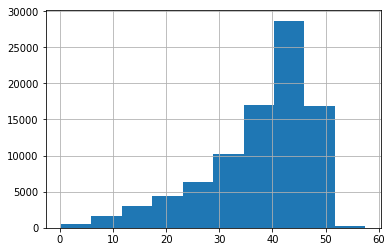

In [46]:
df['r'].hist()

(0, 20000.0)

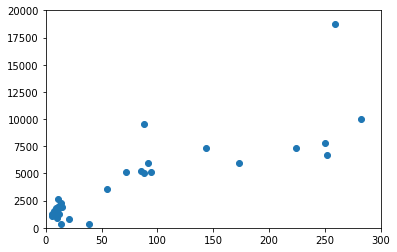

In [57]:
E = 40
plt.scatter(df2['cs1'], df2['cs2'])
plt.xlim(0, 300)
plt.ylim(0, 20e3)


In [63]:
df2.loc[:, ('cs1', 'cs2')].head()

,cs1,cs2
152,778.113314,39673.505884
682,11.019045,1750.988897
1897,250.581678,7822.072664
3796,1266.924975,76882.724028
5781,13.925521,2272.624209


In [71]:
pd.to_datetime(df2['event_time']).head()

152    2017-03-30 05:28:01.948269350
682    2017-03-30 05:28:57.160364610
1897   2017-03-30 05:31:05.326684670
3796   2017-03-30 05:34:32.639400520
5781   2017-03-30 05:37:59.041098160
Name: event_time, dtype: datetime64[ns]

In [72]:
df2.index = pd.to_datetime(df2['event_time'])

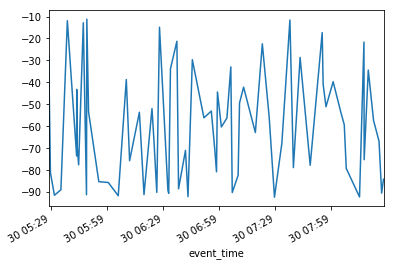

In [76]:
df2['z'].plot()

In [78]:
df['CutLowEnergyBackground'].value_counts()

False    101213
True         21
Name: CutLowEnergyBackground, dtype: int64

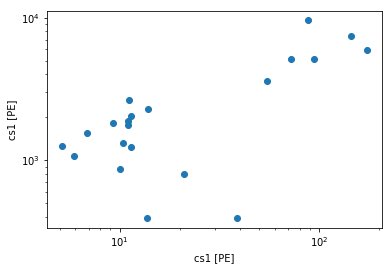

In [82]:
df3 = df[df['CutLowEnergyBackground']]
plt.scatter(df3.cs1, df3.cs2)
plt.xlabel('cs1 [PE]')
plt.ylabel('cs1 [PE]')
plt.xscale('log')
plt.yscale('log')

Text(0,0.5,'z [PE]')

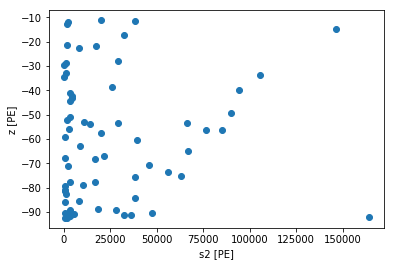

In [86]:
df3 = df[df['CutAllEnergy']]
plt.scatter(df3.s2, df3.z)
plt.xlabel('s2 [PE]')
plt.ylabel('z [PE]')
